# Studi Kasus Deteksi Ranjau Darat

# Tujuan Analisis

Deteksi ranjau yang terkubur di dalam tanah sangat penting dalam hal keselamatan jiwa dan harta benda. Banyak metode yang berbeda telah digunakan dalam hal ini; namun, belum ada yang bisa mencapai keberhasilan 100%. Proses deteksi ranjau terdiri dari fase desain sensor, analisis data, dan algoritma keputusan. Metode anomali magnetik bekerja berdasarkan prinsip pengukuran anomali yang dihasilkan dari objek dalam medan magnet yang mengganggu strukturnya, medan magnet, dan data yang diperoleh pada saat ini digunakan untuk menentukan kondisi seperti gerakan dan posisi. Penentuan parameter seperti posisi, kedalaman atau arah gerak menggunakan anomali magnetik telah dilakukan sejak tahun 1970. Dari setiap faktor-faktor yang disebutkan diatas kita dapat memprediksi jenis dari ranjau darat yang di temukan yang terkubur dalam tanah.

# Data Understanding

## Deskripsi Data

### Penjelasan Land Mines

Ranjau darat adalah jenis senjata peledak yang ditanam di dalam tanah atau ditempatkan di permukaan tanah untuk tujuan militer atau pertahanan. Ranjau ini dirancang untuk meledak secara otomatis atau dengan bantuan pencetus ketika terpicu oleh tekanan, gerakan, atau perubahan dalam medan elektromagnetik.

<img src="16-mines-23706538.webp" width="50%" align="" />

Karakteristik Ranjau Darat:

1. Fungsi Utama:

- Anti-Personnel: Dirancang untuk melukai atau membunuh personel infanteri.

- Anti-Tank: Dirancang untuk merusak atau menghancurkan kendaraan lapis baja seperti tank.

- Booby Trapped: Ditanam dengan perangkap untuk memicu ledakan yang tidak terduga.

2. Konstruksi:

- Badan: Biasanya terbuat dari logam atau plastik, tergantung pada jenisnya.

- Muatan Peledak: Memiliki muatan peledak yang dirancang untuk menimbulkan kerusakan yang signifikan terhadap sasaran yang diinginkan.

- Pencetus: Dapat diaktifkan oleh tekanan, gerakan, atau medan magnetik.

3. Penggunaan:

- Digunakan di medan pertempuran untuk menghalangi gerakan musuh.

- Menjadi ancaman serius bagi personel militer dan sipil setelah konflik berakhir.

4. Bahaya dan Dampak:

- Sering kali tetap aktif dalam waktu yang lama setelah konflik berakhir.

- Menyebabkan cedera serius atau kematian pada orang yang tidak berhubungan dengan konflik.

5. Penanganan:

- Memerlukan pendekatan yang hati-hati dalam deteksi, deaktivasi, dan penghapusan.

- Proses ini sering dilakukan oleh tim khusus dengan peralatan yang tepat untuk mengurangi risiko ledakan tidak terkendali.

Ranjau darat telah digunakan secara luas dalam konflik militer di seluruh dunia, menyebabkan dampak kemanusiaan yang serius dan menjadi tantangan besar dalam upaya pembersihan setelah konflik berakhir.

Fitur yang ada pada dataset ini:

- Voltage (V)

- High (H)

- Soil Type (S)

- Mine Type (M)

Dataset ini memiliki 3 fitur dan 1 target atau class yaitu Mine Type (M)

### Menampilkan data dari uci dataset

In [ ]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('https://archive.ics.uci.edu/static/public/763/data.csv')
df

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


### Fitur

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
 3   M       338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


- Voltage (V) : Nilai tegangan keluaran dari sensor FLC akibat distorsi magnetik.

- High (H) : Ketinggian sensor dari permukaan tanah.

- Soil Type (S) : 6 jenis tanah yang berbeda tergantung pada kondisi kelembapan.

                             1. Kering dan berpasir

                             2. Kering dan Humus

                             3. Kering dan Berkapur

                             4. Lembab dan Berpasir

                             5. Lembab dan Humus

                             6. Lembab dan Berkapur

- Mine Type(M) : Jenis ranjau yang umum ditemukan di darat. Terdiri dari 5 kelas ranjau yang berbeda:

                              1. Null : Tidak ada ranjau

                              2. Anti-tank

                              3. Anti-personnel

                              4. Booby Trapped Anti-personnel

                              5. M14 Anti-personnel

### Penjelasan Class

In [ ]:
df.value_counts('M')

M
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64

Hasil diatas merupakan jenis class yang ada di Mine Type dan jumlah dari setiap class tersebut. Bisa di simpulkan jika jenis class yang ada, yaitu antara 1 sampai 5 yang sudah di jelaskan di bab sebelumnya.

## Identifikasi kualitas data

### Cek Missing Values

Untuk mengetahui kualitas dari dataset yang kita gunakan kita perlu melakukan pengecekan missing values, ini membantu kita dalam melakukan analisis dan model prediksi nantinya. Apa bila dataset yang digunakan tidak memiliki missing values maka akurasi dari prediksi analisis data akan semakin akurat.

Ada beberapa metode penanganan missing values, yaitu:

1. Inputasi missing values:

Inputasi missing values bisa menggunakan nilai rata-rata, median, modus, atau menggunakan metode yang lebih canggih seperti imputasi berbasis regresi atau machine learning.

2. Penghapusan data:

langkah selanjutnya yang dapat dilakukan dalam penanganan missing values adalah menghapus data yang mengandung missing values. Metode ini bisa dilakukan apabila missing values yang ada relatif kecil dibandingkan dengan ukuran dataset.

Untuk melakukan pengecekan missing values bisa menggunakan code dibawah ini:

In [ ]:
df.isnull().sum()

V    0
H    0
S    0
M    0
dtype: int64

dari hasil pengecekan diatas kita bisa lihat bahwa dataset yang kita gunakan tidak memiliki missing values maka tidak diperlukannya penanganan missing values.

### Identifikasi Outlier

Outlier adalah titik data yang secara signifikan berbeda dari mayoritas data dalam satu set. Mereka bisa sangat tinggi atau sangat rendah dibandingkan dengan nilai lainnya. Outlier dapat terjadi karena variabilitas alami, kesalahan pengukuran, atau kondisi ekstrim. Identifikasi outlier penting karena mereka dapat mempengaruhi analisis data dan model prediktif, serta memberikan wawasan atau mengindikasikan masalah dalam data.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

data = pd.read_csv('https://archive.ics.uci.edu/static/public/763/data.csv')

# simpan class risklevel
landmines = df[['M']]

# #hapus kolom yang tidak diperlukan
df = df.drop(['M'], axis=1)

# # Inisialisasi dan fit model LOF
lof = LocalOutlierFactor(n_neighbors=4, contamination=0.4)
outlier_labels = lof.fit_predict(df)

# # Tambahkan label outlier dan M ke dataframe
df['Outlier'] = outlier_labels
df['M'] = landmines
outliers = df[df['Outlier'] == -1]

print(data.head())
print(f"Jumlah outlier yang terdeteksi: {len(outliers)}")
df

          V         H    S  M
0  0.338157  0.000000  0.0  1
1  0.320241  0.181818  0.0  1
2  0.287009  0.272727  0.0  1
3  0.256284  0.454545  0.0  1
4  0.262840  0.545455  0.0  1
Jumlah outlier yang terdeteksi: 135


,V,H,S,Outlier,M
0,0.338157,0.000000,0.0,-1,1
1,0.320241,0.181818,0.0,1,1
2,0.287009,0.272727,0.0,1,1
3,0.256284,0.454545,0.0,1,1
4,0.262840,0.545455,0.0,1,1
...,...,...,...,...,...
333,0.323262,0.909091,0.4,1,5
334,0.444108,0.181818,1.0,-1,5
335,0.353474,0.454545,1.0,1,5
336,0.362537,0.727273,1.0,1,5


Dari hasil pengecekan diatas bisa kita lihat bahwa terdapat data yang merupakan outlier atau nilai yang jaraknya jauh. Dari hasil diatas terdapat 34 jumlah data yang termasuk kedalam outlier. Untuk menangani data outlier kita bisa menggunakan beberapa metode namun yang akan kita lakukan dalam data ini yaitu menghapus data tersebut.

# PRE-PROCESSING DATA

## Menghapus data outlier

          V         H    S  M
0  0.338157  0.000000  0.0  1
1  0.320241  0.181818  0.0  1
2  0.287009  0.272727  0.0  1
3  0.256284  0.454545  0.0  1
4  0.262840  0.545455  0.0  1
Jumlah outlier yang terdeteksi: 34
            V         H    S  M  LOF_Score       LOF
16   0.315347  0.000000  0.2  1         -1 -1.429608
21   0.259818  0.727273  0.2  1         -1 -1.274453
40   0.338368  0.000000  1.0  1         -1 -1.294971
41   0.295015  0.181818  1.0  1         -1 -1.204321
42   0.271994  0.272727  1.0  1         -1 -1.243280
51   0.658609  0.545455  0.0  2         -1 -1.442028
52   0.610271  0.636364  0.0  2         -1 -1.732164
59   0.655588  0.545455  0.6  2         -1 -1.508755
60   0.628398  0.636364  0.6  2         -1 -1.283723
61   0.504531  0.818182  0.6  2         -1 -1.206000
63   0.719032  0.000000  0.2  2         -1 -1.345600
64   0.622356  0.090909  0.2  2         -1 -1.302456
75   0.495256  0.727273  0.8  2         -1 -1.289198
76   0.468277  0.818182  0.8  2         -1 

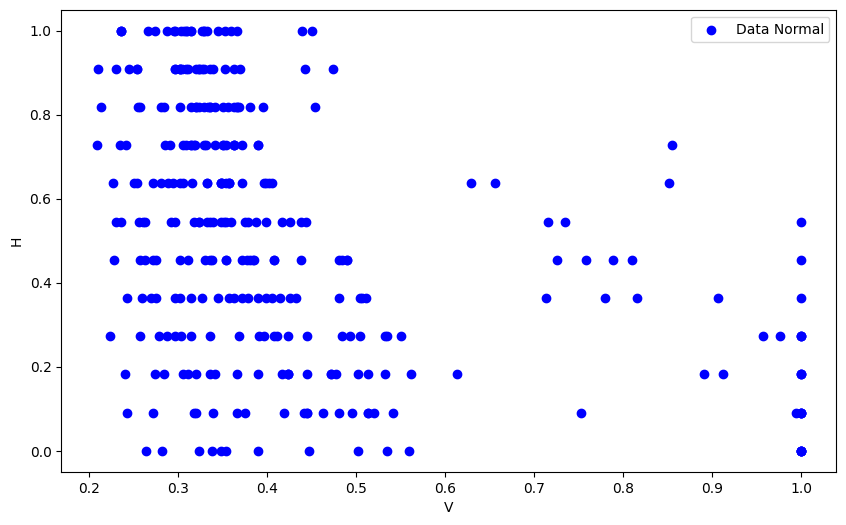

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Membaca dataset
data = pd.read_csv('https://archive.ics.uci.edu/static/public/763/data.csv')

# Menampilkan 5 baris pertama dataset
print(data.head())

# Memilih fitur yang akan digunakan untuk deteksi outlier
features = ['V', 'H', 'S']

# Mengekstraksi fitur dari dataset
X = data[features]

# Membuat model LOF (Local Outlier Factor)
lof = LocalOutlierFactor(n_neighbors=4, contamination=0.1)

# Menerapkan LOF untuk mendeteksi outlier
data['LOF_Score'] = lof.fit_predict(X)
data['LOF'] = lof.negative_outlier_factor_

# Menampilkan outlier
outliers = data[data['LOF_Score'] == -1]
print(f"Jumlah outlier yang terdeteksi: {len(outliers)}")
print(outliers)

# Menghapus baris yang mengandung outlier
data_cleaned = data[data['LOF_Score'] != -1]

# Menghapus kolom LOF_Score dan LOF dari data yang telah dibersihkan
data_cleaned = data_cleaned.drop(columns=['LOF_Score', 'LOF'])

# Menampilkan data setelah outlier dihapus
print(f"Jumlah data setelah outlier dihapus: {len(data_cleaned)}")
print(data_cleaned.head())

# Visualisasi data setelah outlier dihapus
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['V'], data_cleaned['H'], c='b', label='Data Normal')
plt.xlabel('V')
plt.ylabel('H')
plt.legend()
plt.show()

# Modelling

## K-Nearest Neighbor (KNN)

K-Nearest Neighbors (KNN) adalah model pembelajaran mesin terawasi yang dapat digunakan untuk tugas regresi dan klasifikasi. Algoritme ini bersifat non-parametrik, artinya tidak membuat asumsi apa pun tentang distribusi data yang mendasarinya.

Algoritma KNN memprediksi label kumpulan data pengujian dengan melihat label tetangga terdekatnya di ruang fitur kumpulan data pelatihan. “K” adalah hyperparameter terpenting yang dapat disesuaikan untuk mengoptimalkan performa model.

KNN adalah algoritma sederhana dan intuitif yang memberikan hasil yang baik untuk berbagai masalah klasifikasi. Mudah diterapkan dan dipahami, serta dapat diterapkan pada kumpulan data kecil dan besar. Namun, hal ini juga memiliki beberapa kekurangan, dan kelemahan utamanya adalah biaya komputasinya mahal untuk kumpulan data besar atau ruang fitur berdimensi tinggi.

Algoritma KNN digunakan dalam mesin rekomendasi e-commerce, pengenalan gambar, deteksi penipuan, klasifikasi teks, deteksi anomali, dan masih banyak lagi. Dalam tutorial ini, kita akan menggunakan algoritma KNN untuk sistem persetujuan pinjaman

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('data-cleaned.csv')

x = df[['V', 'H', 'S']]
y = df['M']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# df

Accuracy: 0.4918032786885246


In [ ]:
df=pd.read_csv('data-cleaned.csv')

x = df[['V', 'H', 'S']]
y = df['M']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# Melatih model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Menghitung akurasi model pada data uji
y_test_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)

# Membuat data baru untuk prediksi
x_new = [[5.0, 5.5, 2]]

# Melakukan prediksi untuk data baru
y_new_pred = knn.predict(x_new)
if y_new_pred == 1:
    print(f"Prediction for new data: {y_new_pred[0]} (Tidak Ada Land Mines)")
elif y_new_pred == 2:
    print(f"Prediction for new data: {y_new_pred[0]} (Anti tank)")
elif y_new_pred == 3:
    print(f"Prediction for new data: {y_new_pred[0]} (Anti Presonnel)")
elif y_new_pred == 4:
    print(f"Prediction for new data: {y_new_pred[0]} (Bobby Trapped Anti Presonnel)")
elif y_new_pred == 5:
    print(f"Prediction for new data: {y_new_pred[0]} (M14 Anti-personnel)")
print(f"Accuracy: {accuracy}")
print(f'Accuracy: {accuracy * 100:.2f}%')

Prediction for new data: 2 (Anti tank)
Accuracy: 0.4918032786885246
Accuracy: 49.18%
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Gaussian Naive Bayes Classification

Gaussian Naive Bayes adalah jenis metode Naive Bayes yang mempertimbangkan atribut kontinu dan fitur data mengikuti distribusi Gaussian di seluruh kumpulan data. Dalam terminologi perpustakaan Sklearn, Gaussian Naive Bayes adalah jenis algoritma klasifikasi yang bekerja pada fitur terdistribusi normal berkelanjutan yang didasarkan pada algoritma Naive Bayes. 

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Membaca data dari file CSV
df = pd.read_csv('data-cleaned.csv')

# Memisahkan fitur dan target
x = df[['V', 'H', 'S']]
y = df['M']

# Melakukan train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# Melatih model Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

# Menghitung akurasi model pada data uji
y_test_pred = nb.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Membuat data baru untuk prediksi
x_new = [[5.0, 5.5, 2]]

# Melakukan prediksi untuk data baru
y_new_pred = nb.predict(x_new)
if y_new_pred == 1:
    print(f"Prediction for new data: {y_new_pred[0]} (Tidak Ada Land Mines)")
elif y_new_pred == 2:
    print(f"Prediction for new data: {y_new_pred[0]} (Anti tank)")
elif y_new_pred == 3:
    print(f"Prediction for new data: {y_new_pred[0]} (Anti Presonnel)")
elif y_new_pred == 4:
    print(f"Prediction for new data: {y_new_pred[0]} (Bobby Trapped Anti Presonnel)")
elif y_new_pred == 5:
    print(f"Prediction for new data: {y_new_pred[0]} (M14 Anti-personnel)")
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 0.5081967213114754
Prediction for new data: 2 (Anti tank)
Accuracy: 50.82%
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## Stacking Classifier

Stacking classifier adalah metode ensemble learning di mana beberapa model (classifier) digunakan untuk menggabungkan prediksi mereka. Prosesnya melibatkan dua tahap utama:

- Pembuatan Prediksi: Beberapa model classifier yang berbeda digunakan untuk membuat prediksi pada dataset yang sama.

- Penggabungan Prediksi: Prediksi yang dihasilkan oleh model-model tersebut digunakan sebagai input untuk model lain (meta-classifier) yang kemudian memberikan output akhir.

Proses ini membantu meningkatkan kinerja prediksi dibandingkan dengan menggunakan model tunggal karena memanfaatkan kekuatan berbagai jenis model. Meta-classifier dapat menggunakan model yang lebih kompleks atau lebih sederhana, seperti logistic regression, untuk menggabungkan prediksi dari model-model pendukungnya.

Dengan cara ini, stacking classifier mampu menangani lebih baik berbagai jenis masalah prediksi, meminimalkan kelemahan dari setiap model tunggal, dan meningkatkan keakuratan serta keandalan prediksi.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Membaca data dari file CSV
df = pd.read_csv('data-cleaned.csv')

# Memisahkan fitur dan target
x = df[['V', 'H', 'S']]
y = df['M']

# Melakukan train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# Mendefinisikan base models
base_models = [
    ('knn3', KNeighborsClassifier(n_neighbors=3)),
    ('knn5', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB())
]

# Mendefinisikan meta model
meta_model = LogisticRegression()

# Membuat stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Melatih stacking classifier
stacking_clf.fit(x_train, y_train)

# Menghitung akurasi model pada data uji
y_test_pred = stacking_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Membuat data baru untuk prediksi
x_new = [[5.0, 5.5, 2]]

# Melakukan prediksi untuk data baru
y_new_pred = stacking_clf.predict(x_new)
if y_new_pred == 1:
    print(f"Prediction for new data: {y_new_pred[0]} (Tidak Ada Land Mines)")
elif y_new_pred == 2:
    print(f"Prediction for new data: {y_new_pred[0]} (Anti tank)")
elif y_new_pred == 3:
    print(f"Prediction for new data: {y_new_pred[0]} (Anti Presonnel)")
elif y_new_pred == 4:
    print(f"Prediction for new data: {y_new_pred[0]} (Bobby Trapped Anti Presonnel)")
elif y_new_pred == 5:
    print(f"Prediction for new data: {y_new_pred[0]} (M14 Anti-personnel)")
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 0.5573770491803278
Prediction for new data: 2 (Anti tank)
Accuracy: 55.74%
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


dari hasil diatas bisa kita lihat bahwa akurasi yang diberikan menggunakan metode stacking ini memiliki akurasi yang terbilang kecil. prediksi yang diberikan adalah 2 dengan akurasinya adalah 55.74%.

## Bagging Classifier

Bagging (Bootstrap Aggregating) classifier adalah metode ensemble learning di mana banyak model (biasanya model decision tree) digunakan untuk membuat prediksi. Prosesnya melibatkan beberapa tahap utama:

- Pembuatan Sampel Bootstrap: Data pelatihan dibagi menjadi beberapa sampel bootstrap, yaitu sampel acak dengan penggantian dari data pelatihan asli.

- Pembuatan Model: Pada setiap sampel bootstrap, model decision tree (atau model lainnya) dibangun.

- Penggabungan Prediksi: Prediksi dari semua model tersebut digabungkan dengan metode voting (pada klasifikasi) atau rata-rata (pada regresi) untuk menghasilkan prediksi akhir.

Keuntungan utama dari bagging classifier adalah mengurangi varian dari model tunggal dengan menggabungkan hasil dari beberapa model, yang pada akhirnya dapat menghasilkan model yang lebih stabil dan dapat diandalkan. Metode ini sering digunakan dalam aplikasi machine learning untuk meningkatkan kinerja prediksi, terutama pada dataset yang besar dan kompleks.

Accuracy: 0.45901639344262296
Accuracy: 45.90%
Iteration 1: Accuracy = 0.3770
Iteration 2: Accuracy = 0.5082
Iteration 3: Accuracy = 0.4098
Iteration 4: Accuracy = 0.4262
Iteration 5: Accuracy = 0.5082
Iteration 6: Accuracy = 0.5246
Iteration 7: Accuracy = 0.3934
Iteration 8: Accuracy = 0.4098
Iteration 9: Accuracy = 0.3115
Iteration 10: Accuracy = 0.4262
Iteration 11: Accuracy = 0.3279
Iteration 12: Accuracy = 0.4426
Iteration 13: Accuracy = 0.4590
Iteration 14: Accuracy = 0.3443
Iteration 15: Accuracy = 0.4098
Iteration 16: Accuracy = 0.3443
Iteration 17: Accuracy = 0.4754
Iteration 18: Accuracy = 0.3279
Iteration 19: Accuracy = 0.4426
Iteration 20: Accuracy = 0.6066
Iteration 21: Accuracy = 0.4262
Iteration 22: Accuracy = 0.4098
Iteration 23: Accuracy = 0.3443
Iteration 24: Accuracy = 0.4426
Iteration 25: Accuracy = 0.4098
Iteration 26: Accuracy = 0.4262
Iteration 27: Accuracy = 0.5082
Iteration 28: Accuracy = 0.5410
Iteration 29: Accuracy = 0.4098
Iteration 30: Accuracy = 0.4590
It

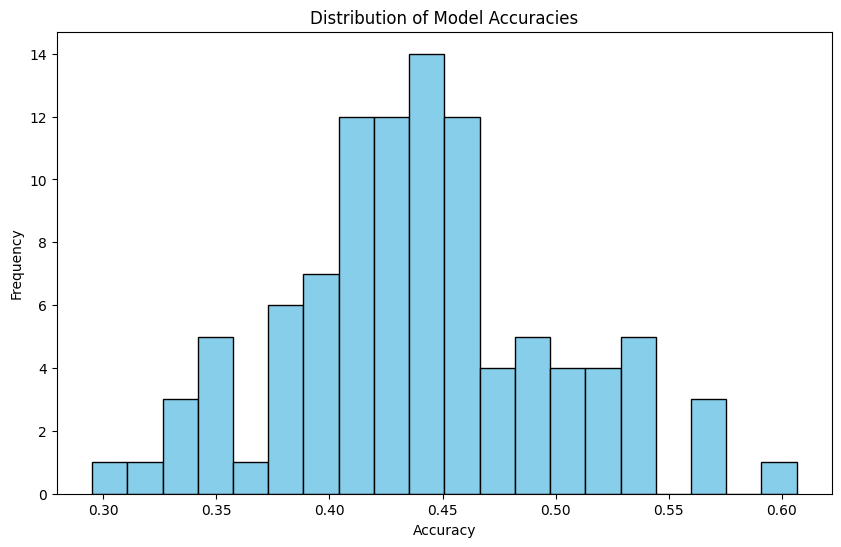

In [ ]:
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv('data-cleaned.csv')

# Memisahkan fitur dan target
x = df[['V', 'H', 'S']]
y = df['M']

# Melakukan train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# Membuat base model Naive Bayes
base_model = GaussianNB()

# Membuat bagging classifier dengan base model Naive Bayes
bagging_clf = BaggingClassifier(base_estimator=base_model, n_estimators=10, random_state=50)

# Melatih bagging classifier
bagging_clf.fit(x_train, y_train)

# Menghitung akurasi model pada data uji
y_test_pred = bagging_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Melakukan prediksi untuk data baru
y_new_pred = bagging_clf.predict(x_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualisasi dengan Matplotlib
accuracies = []

# Melatih model beberapa kali untuk mendapatkan distribusi akurasi
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    bagging_clf.fit(x_train, y_train)
    y_test_pred = bagging_clf.predict(x_test)
    acc = accuracy_score(y_test, y_test_pred)
    accuracies.append(acc)
    print(f"Iteration {i+1}: Accuracy = {acc:.4f}")

# Menampilkan histogram akurasi
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

bisa kita lihat akurasi yang paling sering muncul dari metode bagging adalah 0.45 atau 45.90%. akurasi ini bisa dibilang memiliki nilai yang cukup kecil untuk memprediksi suatu data baru.

In [ ]:
df = pd.read_csv('data-cleaned.csv')

# Memisahkan fitur dan target
x = df[['V', 'H', 'S']]
y = df['M']

# Melakukan train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# Membuat base model Naive Bayes
base_model = GaussianNB()

# Membuat bagging classifier dengan base model Naive Bayes
bagging_clf = BaggingClassifier(base_estimator=base_model, n_estimators=10, random_state=50)

# Melatih bagging classifier
bagging_clf.fit(x_train, y_train)

# Menghitung akurasi model pada data uji
y_test_pred = bagging_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Membuat data baru untuk prediksi
x_new = [[5.0, 5.5, 2]]

# Melakukan prediksi untuk data baru
y_new_pred = bagging_clf.predict(x_new)
if y_new_pred == 1:
    print(f"Prediction for new data: {y_new_pred[0]} (Tidak Ada Land Mines)")
elif y_new_pred == 2:
    print(f"Prediction for new data: {y_new_pred[0]} (Anti tank)")
elif y_new_pred == 3:
    print(f"Prediction for new data: {y_new_pred[0]} (Anti Presonnel)")
elif y_new_pred == 4:
    print(f"Prediction for new data: {y_new_pred[0]} (Bobby Trapped Anti Presonnel)")
elif y_new_pred == 5:
    print(f"Prediction for new data: {y_new_pred[0]} (M14 Anti-personnel)")
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 0.45901639344262296
Prediction for new data: 2 (Anti tank)
Accuracy: 45.90%
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


prediksi yang diberikan dengan menggunakan metode ini adalah 2 atau tipe land mines yang terdeteksi adalah tipe land mine Anti Tank

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=10945847-e31e-4133-a073-8fa6c5986d5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>